In [1]:
from keras.datasets import imdb
import numpy as np

Using TensorFlow backend.


In [2]:
(train_data,train_label),(test_data,test_label)=imdb.load_data(num_words=10000)

In [3]:
print(train_data.shape)

(25000,)


In [4]:
word_idx=imdb.get_word_index()

In [5]:
list(word_idx.items())[:10]

[(u'fawn', 34701),
 (u'tsukino', 52006),
 (u'nunnery', 52007),
 (u'sonja', 16816),
 (u'vani', 63951),
 (u'woods', 1408),
 (u'spiders', 16115),
 (u'hanging', 2345),
 (u'woody', 2289),
 (u'trawling', 52008)]

In [6]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [7]:
idx_word=dict([(value,key) for [key,value] in word_idx.items()])

In [8]:
actual_review=' '.join(idx_word.get(idx-3,'?') for idx in train_data[0])

In [9]:
actual_review

u"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you t

In [10]:
train_label[0]

1

In [11]:
def vectorise_sentences(sentences,dim=10000):
    outputs=np.zeros((len(sentences),dim))
    for i,idx in enumerate(sentences):
        outputs[i,idx]=1
    return outputs   

In [25]:
x_train=vectorise_sentences(train_data)
x_test=vectorise_sentences(test_data)
print(x_train.shape)

(25000, 10000)


In [27]:
y_train=np.array(train_label).astype('float32')
y_test=np.array(test_label).astype('float32')
print(y_test.shape)

(25000,)


In [14]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [15]:
model=Sequential()
model.add(Dense(16,activation='relu',input_shape=(10000,)))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation ='sigmoid'))

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])

In [18]:
hist=model.fit(x_train,y_train,epochs=20,batch_size=256,validation_split=0.3)

Train on 17500 samples, validate on 7500 samples
Epoch 1/20
17500/17500 [==============================] - 2s 128us/step - loss: 0.4564 - acc: 0.8158 - val_loss: 0.2979 - val_acc: 0.8839
Epoch 2/20
17500/17500 [==============================] - 1s 81us/step - loss: 0.2198 - acc: 0.9193 - val_loss: 0.2890 - val_acc: 0.8861
Epoch 3/20
17500/17500 [==============================] - 1s 80us/step - loss: 0.1527 - acc: 0.9485 - val_loss: 0.3033 - val_acc: 0.8823
Epoch 4/20
17500/17500 [==============================] - 2s 90us/step - loss: 0.1137 - acc: 0.9641 - val_loss: 0.3213 - val_acc: 0.8837
Epoch 5/20
17500/17500 [==============================] - 1s 76us/step - loss: 0.0833 - acc: 0.9760 - val_loss: 0.3680 - val_acc: 0.8772
Epoch 6/20
17500/17500 [==============================] - 1s 76us/step - loss: 0.0600 - acc: 0.9850 - val_loss: 0.4145 - val_acc: 0.8740
Epoch 7/20
17500/17500 [==============================] - 1s 77us/step - loss: 0.0433 - acc: 0.9902 - val_loss: 0.4744 - val_acc

In [19]:
h=hist.history

In [20]:
import matplotlib.pyplot as plt

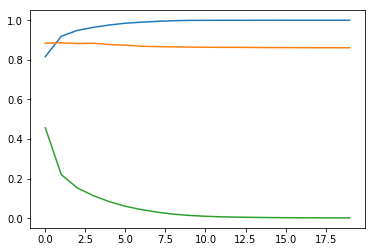

In [21]:
plt.plot(h['acc'])
plt.plot(h['val_acc'])
plt.plot(h['loss'])
plt.show()

In [24]:
model.evaluate(x_test,y_test)[0]

25000/25000 [==============================] - 2s 62us/step


0.9663208704176545

In [23]:
pred.to_csv('filename.csv',index = True)

NameError: name 'pred' is not defined

In [ ]:
pred = pd.DataFrame(pred,columns = ["",""])